# Goodreads-books analyses
## comprehensive list of books listed in goodreads

In [398]:
import sklearn
import pylab
import numpy as np
import pandas as pd
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu
from statsmodels.sandbox.stats.multicomp import multipletests 
from numpy.random import seed
from numpy.random import randn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.gofplots import qqplot_2samples
from statsmodels.stats.proportion import proportion_confint

In [265]:
df = pd.read_csv('./books.csv', sep = ",")
df = df.drop('isbn', 1)
df = df.drop('isbn13', 1)
df['publication_year'] = df['publication_date'].str[-4:]
df['publisher;;;'] = df['publisher;;;'].str[:-3]
df.rename(columns={'publisher;;;': 'publisher'}, inplace=True)
df.rename(columns={'  num_pages': 'num_pages'}, inplace=True)
df['first_author'] = df['authors'].str.extract(r'(.*?)\/')
df['first_author'] = df['first_author'].fillna(df['authors'])
df = df.dropna(thresh = df.shape[1])

In [182]:
df.head(50)

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,first_author
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652.0,2095690.0,27591.0,9/16/2006,Scholastic Inc.,2006,J.K. Rowling
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870.0,2153167.0,29221.0,9/1/2004,Scholastic Inc.,2004,J.K. Rowling
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352.0,6333.0,244.0,11/1/2003,Scholastic,2003,J.K. Rowling
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435.0,2339585.0,36325.0,5/1/2004,Scholastic Inc.,2004,J.K. Rowling
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690.0,41428.0,164.0,9/13/2004,Scholastic,2004,J.K. Rowling
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342.0,28242.0,808.0,9/12/2005,Scholastic,2005,J.K. Rowling
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,eng,815.0,3628.0,254.0,11/1/2005,Gramercy Books,2005,Douglas Adams
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,eng,815.0,249558.0,4080.0,4/30/2002,Del Rey Books,2002,Douglas Adams
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,eng,215.0,4930.0,460.0,8/3/2004,Crown,2004,Douglas Adams
10,16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,eng,6.0,1266.0,253.0,3/23/2005,Random House Audio,2005,Douglas Adams


In [279]:
df.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11095.000000,11095.000000,1.109500e+04,11095.000000
mean,3.934994,336.549256,1.798588e+04,543.255701
std,0.346459,241.303609,1.126377e+05,2579.744810
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.050000e+02,9.000000
50%,3.960000,299.000000,7.490000e+02,47.000000
75%,4.140000,416.000000,5.018500e+03,238.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000


Проверим все количественные значения на нормальность с помощью теста Шапиро-Уилка. Оказывается, в нашем датасете нет нормально распределеных данных. А жаль. Будем в дальнейшем испольновать непарамметрические тесты.

In [277]:
stat_rate, p_rate = scipy.stats.shapiro(df["average_rating"])
print('Statistics = %.3f, p = %.10f \n' % (stat_rate, p_rate))
if p > 0.05:
    print('Probably Normal')
else:
    print('Probably not Normal')

Statistics = 0.819, p = 0.0000000000 

Probably not Normal


In [278]:
stat_pg, p_pg = scipy.stats.shapiro(df["num_pages"])
print('Statistics = %.3f, p = %.10f \n' % (stat_pg, p_pg))
if p > 0.05:
    print('Probably Normal')
else:
    print('Probably not Normal')

Statistics = 0.787, p = 0.0000000000 

Probably not Normal


In [281]:
stat_rtc, p_rtc = scipy.stats.shapiro(df["ratings_count"])
print('Statistics = %.3f, p = %.10f \n' % (stat_rtc, p_rtc))
if p > 0.05:
    print('Probably Normal')
else:
    print('Probably not Normal')

Statistics = 0.126, p = 0.0000000000 

Probably not Normal


In [282]:
stat_rwc, p_rwc = scipy.stats.shapiro(df["text_reviews_count"])
print('Statistics = %.3f, p = %.10f \n' % (stat_rwc, p_rwc))
if p > 0.05:
    print('Probably Normal')
else:
    print('Probably not Normal')

Statistics = 0.178, p = 0.0000000000 

Probably not Normal


In [285]:
reject, p_corrected, a1, a2 = multipletests([p_rate, p_pg, p_rtc, p_rwc],
                                            alpha = 0.05, 
                                            method = 'fdr_bh') 
print(p_corrected)

[0. 0. 0. 0.]


## Язык книги

Разделим наш датасет на две выборки - английские книги и книги, написаные на другом языке. Ожидаемо, первая выборка существенно объемнее.

In [205]:
df1 = df[df.language_code == ("eng" or "en-GB" or "en-US")]
df2 = df[~df.index.isin(df1.index)]

In [186]:
df1.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,8886.000000,8886.000000,8.886000e+03,8886.000000
mean,3.934993,336.968602,2.162218e+04,646.666554
std,0.354071,246.513138,1.253594e+05,2866.250224
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.780000,194.000000,1.430000e+02,11.000000
50%,3.960000,298.000000,1.005500e+03,60.000000
75%,4.140000,416.000000,6.599000e+03,301.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000


In [187]:
df2.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,2209.000000,2209.000000,2209.000000,2209.000000
mean,3.934998,334.862381,3358.375283,127.271616
std,0.314051,219.143942,15560.590978,404.052230
min,0.000000,0.000000,0.000000,0.000000
25%,3.770000,192.000000,50.000000,4.000000
50%,3.960000,303.000000,257.000000,20.000000
75%,4.130000,432.000000,1435.000000,84.000000
max,5.000000,2480.000000,451443.000000,8119.000000


Проверим с помощью U-теста Манна-Уитни распределены ли оценки в обеих выборках одинаково или нет.

H0: Распределения одинаковые

H1: Распределения разные

p-value получилось равным 0.156, то есть на уровне значимости 5% мы не можем отвергнуть H0.

In [188]:
seed(1)
stat, p = mannwhitneyu(df1['average_rating'], df2['average_rating'])
print('Statistics = %.3f, p = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics = 9678626.000, p = 0.156
Same distribution (fail to reject H0)


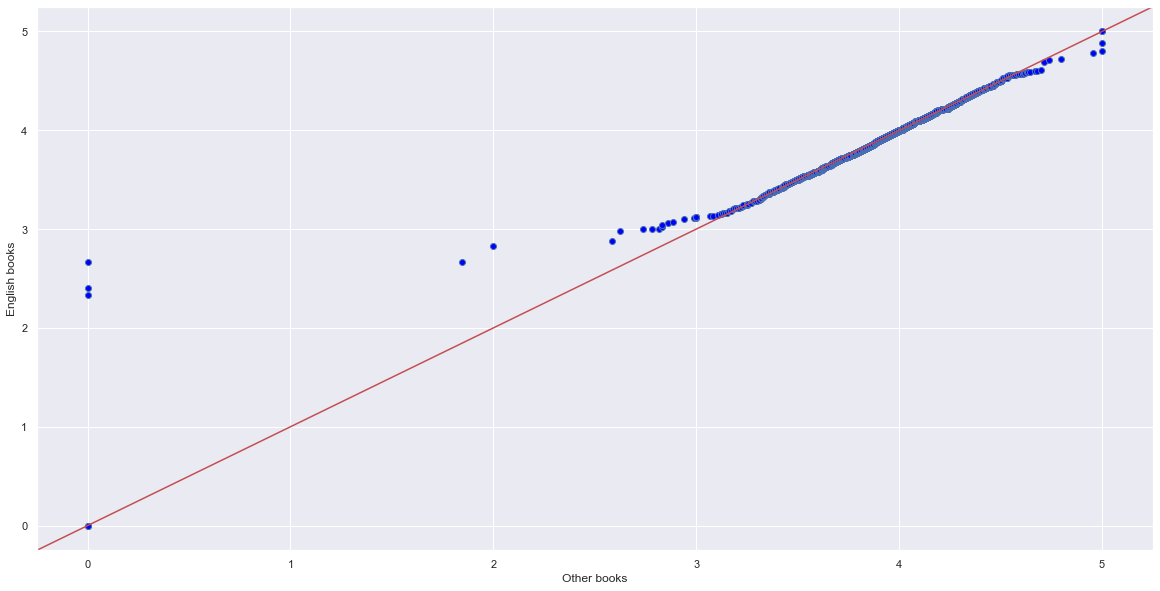

In [379]:
x = df1['average_rating']
y = df2['average_rating']
pp_x = sm.ProbPlot(x)
pp_y = sm.ProbPlot(y)
fig = qqplot_2samples(pp_x, pp_y, xlabel='English books', ylabel='Other books', line="45", ax=None)


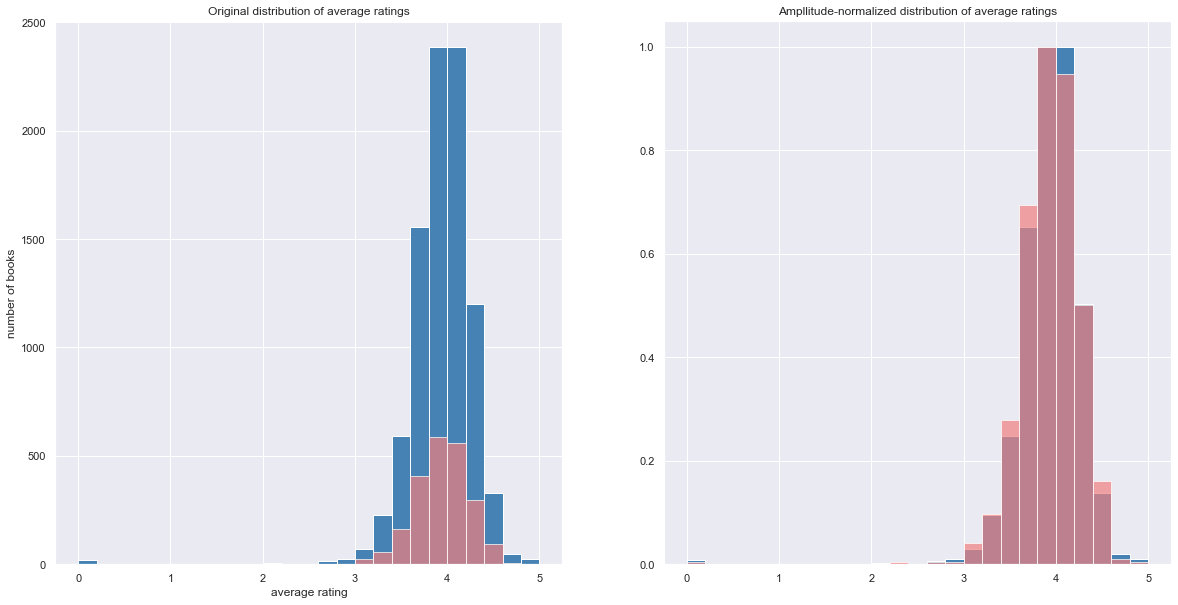

In [438]:
##computing the bin properties (same for both distributions)
num_bin = 25
bin_lims = np.linspace(0,5,num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(df1['average_rating'], bins=bin_lims)
hist2, _ = np.histogram(df2['average_rating'], bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 10))

ax1.bar(bin_centers, hist1, width = bin_widths, align = 'center', color='steelblue')
ax1.bar(bin_centers, hist2, width = bin_widths, align = 'center', alpha = 0.7, color="lightcoral")
ax1.set_title('Original distribution of average ratings')
ax1.set_ylabel('number of books')
ax1.set_xlabel('average rating')

ax2.bar(bin_centers, hist1b, width = bin_widths, align = 'center', color='steelblue')
ax2.bar(bin_centers, hist2b, width = bin_widths, align = 'center', color="lightcoral", alpha = 0.7)
ax2.set_title('Ampllitude-normalized distribution of average ratings')
ax1.set_ylabel('number of books')
ax1.set_xlabel('average rating')

plt.show()

C:\Users\nadia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


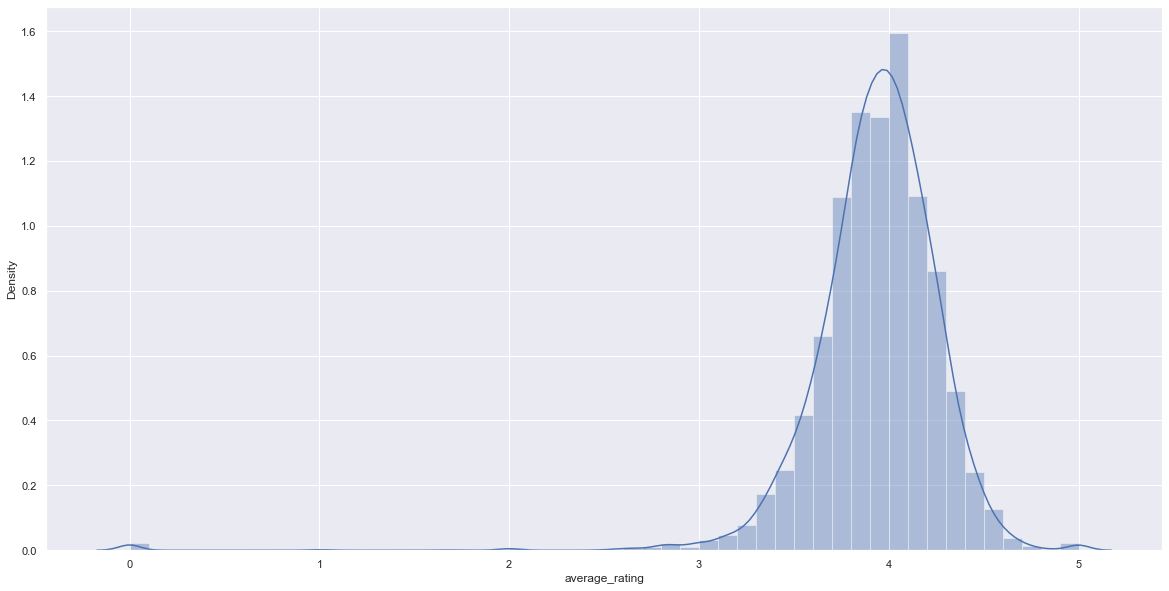

In [355]:
sns.set(rc={'figure.figsize':(20,10)})
g = sns.distplot(df1["average_rating"])

C:\Users\nadia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


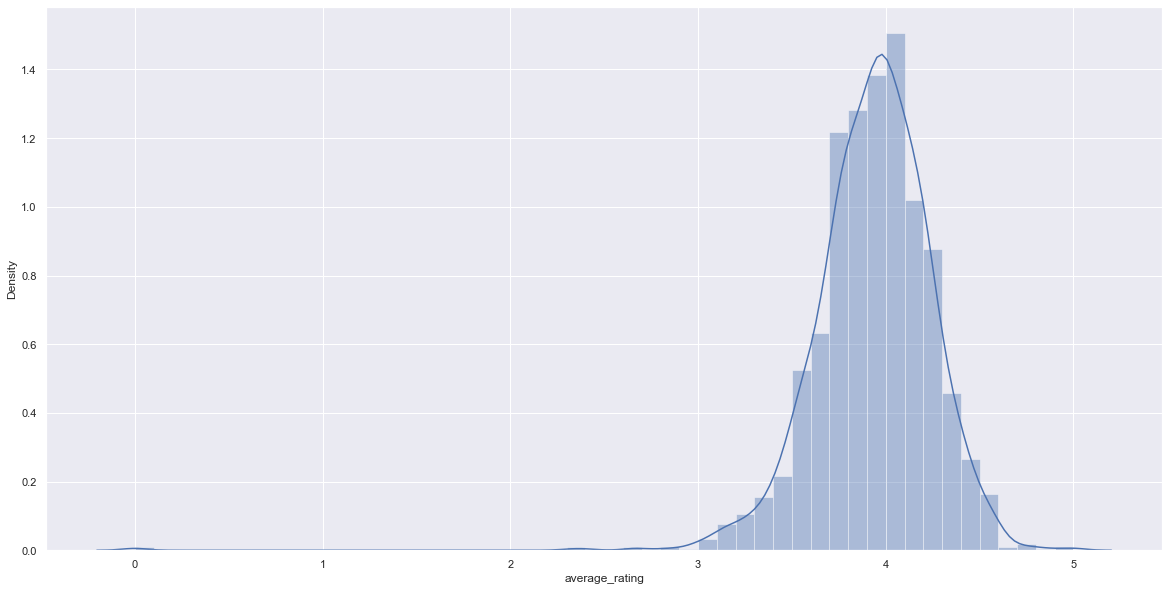

In [356]:
g = sns.distplot(df2["average_rating"])

Построим 95% доверительный интервал для медианы оценок английских и других книг.

In [440]:
intrv = proportion_confint(len(df1['average_rating']), len(df1['average_rating'])+len(df2['average_rating']), method='normal')
print('Normal intermal is [%f, %f] with width %f' % (intrv[0], intrv[1], intrv[1]-intrv[0]))

Normal intermal is [0.793471, 0.808332] with width 0.014861


## Количество страниц в книге

Есть основания полагать, что короткие книги читают чаще, что подтверждается данными ниже.
Однако в среднем оценка более длинных книг выше, что можно объяснить тем, что люди менее вероятно дочитают до конца книгу, которая им не нравится, поэтому длинные книги дочитываются людьим, которые заведомо поставят им высокую оценку.

In [275]:
df['num_pages_grp']= np.select(
    [
        df['num_pages'].between(0, 249, inclusive=True), 
        df['num_pages'].between(250, 499, inclusive=True),
        df['num_pages'].between(500, 749, inclusive=True),
        df['num_pages'].between(750, 999, inclusive=True),
        df['num_pages']>=1000    
    ], 
    [
        '<250', 
        '250-499',
        '500-749',
        '750-999',
        '>=1000'
    ], 
    default='Unknown'
)
by_pages = df.groupby('num_pages_grp').agg({'title':'count','average_rating':np.mean,'text_reviews_count':'sum'})
by_pages = by_pages.sort_values('title', ascending = False)
by_pages

,title,average_rating,text_reviews_count
num_pages_grp,,,
250-499,5091,3.909849,3300503.0
<250,4261,3.915679,1561499.0
500-749,1184,4.018632,835933.0
750-999,342,4.084269,224574.0
>=1000,217,4.212581,104913.0


Разделим наш датасет на две выборки из коротких и длинных книг. Коротких книг намного больше, но длинные имеют в среднем более высокую оценку.

In [391]:
df3 = df[df.num_pages <= 500]
df4 = df[~df.index.isin(df3.index)]

In [394]:
df3.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,9360.000000,9360.000000,9.360000e+03,9360.000000
mean,3.912620,262.234829,1.684683e+04,519.810897
std,0.351796,120.967250,1.002706e+05,2295.627789
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.760000,182.000000,1.010000e+02,9.000000
50%,3.940000,264.000000,7.175000e+02,46.000000
75%,4.110000,352.000000,4.721250e+03,230.000000
max,5.000000,500.000000,2.530894e+06,56604.000000


In [393]:
df4.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,1735.000000,1735.000000,1.735000e+03,1735.000000
mean,4.055700,737.461671,2.413086e+04,669.736023
std,0.287586,320.812517,1.638942e+05,3757.156551
min,0.000000,501.000000,0.000000e+00,0.000000
25%,3.900000,560.000000,1.400000e+02,11.000000
50%,4.070000,644.000000,9.140000e+02,50.000000
75%,4.240000,800.000000,7.071500e+03,289.500000
max,5.000000,6576.000000,4.597666e+06,94265.000000


Проверим с помощью двувыборочного теста Колмогорова-Смирнова, распределены ли оценки у коротких (<=500 страниц) и длинных (>500 страниц) книг одинаково или нет.

H0: Распределения одинаковые

H1: Распределения разные

p-value получилось равным 3.552713678800501e-15, то есть на уровне значимости 5% мы отвергаем H0.

Median of short books is 3.940
Median of long books is 4.070
KstestResult(statistic=0.21363641961624671, pvalue=3.552713678800501e-15)
Different distribution (reject H0)


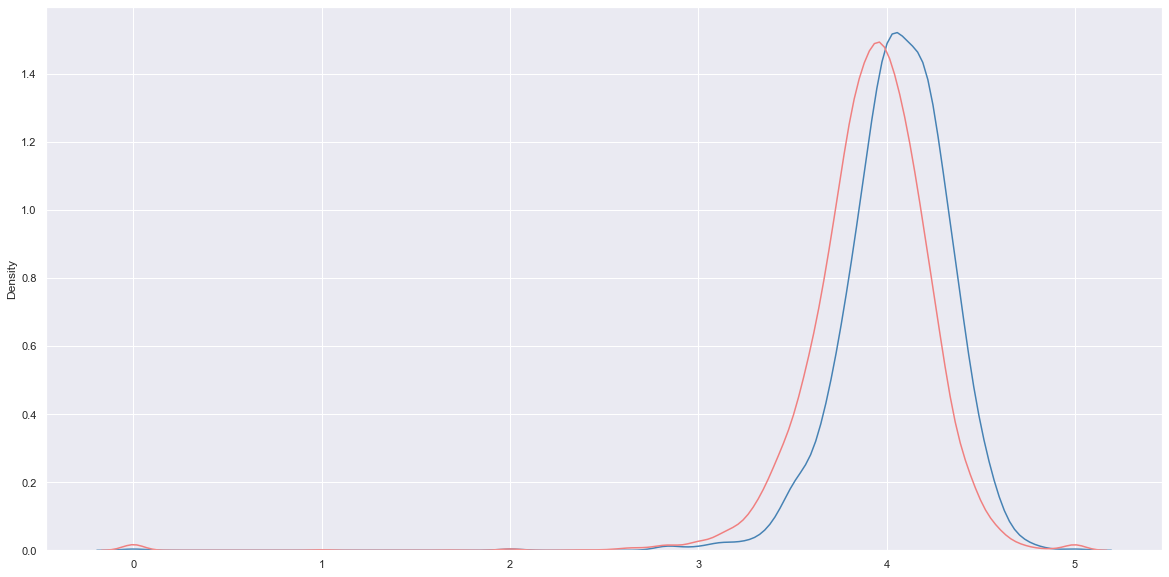

In [395]:
print('Median of short books is %.3f' % (df3['average_rating'].median()))
print('Median of long books is %.3f' % (df4['average_rating'].median()))
print(stats.ks_2samp(df3['average_rating'], df4['average_rating']))
sns.kdeplot(np.array(df4['average_rating']), color='steelblue')
sns.kdeplot(np.array(df3['average_rating']), color='lightcoral')
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

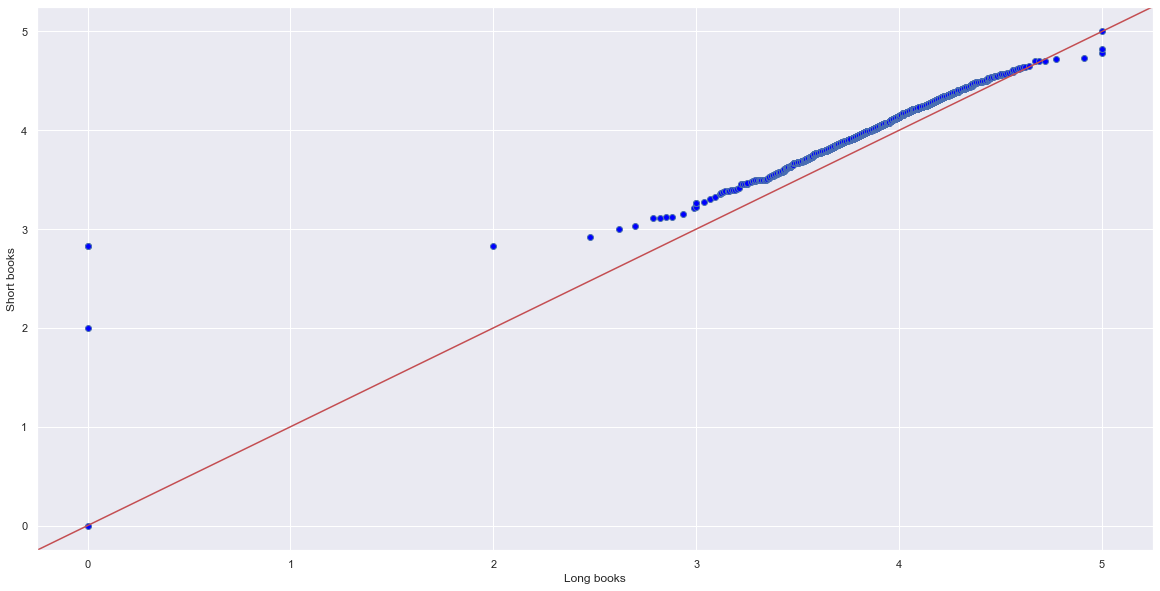

In [437]:
x = df3['average_rating']
y = df4['average_rating']
pp_x = sm.ProbPlot(x)
pp_y = sm.ProbPlot(y)
fig = qqplot_2samples(pp_x, pp_y, xlabel='Short books', ylabel='Long books', line="45", ax=None)


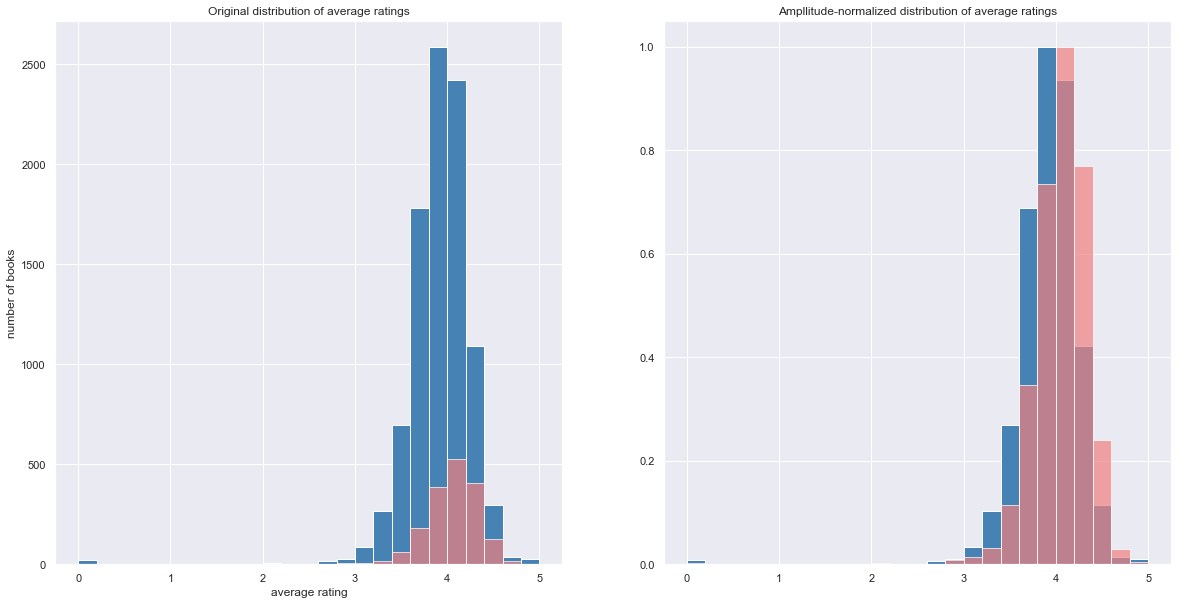

In [432]:
##computing the bin properties (same for both distributions)
num_bin = 25
bin_lims = np.linspace(0,5,num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(df3['average_rating'], bins=bin_lims)
hist2, _ = np.histogram(df4['average_rating'], bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 10))

ax1.bar(bin_centers, hist1, width = bin_widths, align = 'center', color='steelblue')
ax1.bar(bin_centers, hist2, width = bin_widths, align = 'center', alpha = 0.7, color="lightcoral")
ax1.set_title('Original distribution of average ratings')
ax1.set_ylabel('number of books')
ax1.set_xlabel('average rating')

ax2.bar(bin_centers, hist1b, width = bin_widths, align = 'center', color='steelblue')
ax2.bar(bin_centers, hist2b, width = bin_widths, align = 'center', color="lightcoral", alpha = 0.7)
ax2.set_title('Ampllitude-normalized distribution of average ratings')
ax1.set_ylabel('number of books')
ax1.set_xlabel('average rating')

plt.show()

Построим 95% доверительный интервал для медианы оценок коротких и длинных книг.

In [401]:
intrv = proportion_confint(len(df4['average_rating']), len(df3['average_rating'])+len(df4['average_rating']), method='normal')
print('Normal intermal is [%f, %f] with width %f' % (intrv[0], intrv[1], intrv[1]-intrv[0]))

Normal intermal is [0.149618, 0.163135] with width 0.013517


## Автор книги

In [439]:
by_authers = df.groupby('first_author').agg({'title':'count','average_rating':np.mean,'text_reviews_count':'sum'})
by_authers = by_authers.sort_values('title', ascending = False)
by_authers.head(15)

,title,average_rating,text_reviews_count
first_author,,,
William Shakespeare,88,3.930682,47968.0
Stephen King,81,4.004444,72584.0
J.R.R. Tolkien,51,4.223137,62664.0
P.G. Wodehouse,46,4.164565,5665.0
Agatha Christie,45,3.957556,55506.0
James Patterson,43,3.902093,54455.0
Roald Dahl,41,4.061707,37963.0
Orson Scott Card,40,3.794000,28276.0
Mercedes Lackey,40,4.002750,7279.0


## Год публикации книги

In [289]:
by_years = df.groupby('publication_year').agg({'title':'count','average_rating':np.mean,'text_reviews_count':'sum'})
by_years = by_years.sort_values('title', ascending = False)
by_years.head(20)

,title,average_rating,text_reviews_count
publication_year,,,
2006,1697,3.914078,1456003.0
2005,1258,3.925469,725518.0
2004,1067,3.955127,685815.0
2003,928,3.928890,638277.0
2002,797,3.937415,448139.0
2001,655,3.944092,349395.0
2000,533,3.922889,208590.0
2007,518,3.914865,371125.0
1999,450,3.906067,272472.0


In [303]:
most_books_publisher = df.groupby('publisher')['title'].count().reset_index().sort_values('title', ascending=False).head(20)
df_subset = df[df['publisher'].isin(most_books_publisher.reset_index()['publisher'].tolist())]
df_subset = df_subset[df_subset['publication_year'].isin(['1997', '1998', '1999', '2000','2001','2002', '2003','2004','2005','2006','2007'])]
df_subset = df_subset.groupby(["publisher","publication_year"]).agg({"average_rating":np.mean}).reset_index()
df_subset = df_subset.pivot("publisher", "publication_year", "average_rating")
df_subset = df_subset.dropna(thresh = df_subset.shape[1])
df_subset

publication_year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
publisher,,,,,,,,,,,
Ballantine Books,3.790833,3.809000,3.817500,3.682000,3.832143,3.827500,4.007143,3.867500,3.938333,3.878519,3.746667
Bantam,3.902857,3.885000,3.835000,3.823333,3.862222,4.011250,3.788333,3.877143,3.998571,3.935000,3.855000
Berkley,3.810000,4.060000,3.756000,3.750000,3.753333,3.936667,3.962857,3.950667,3.855000,3.878182,3.813333
Del Rey,3.947500,3.900000,3.840000,3.790000,3.810000,4.075000,4.132500,4.056250,4.133077,4.042667,4.216667
Dover Publications,3.895000,3.766667,3.720000,3.940000,4.040000,3.927143,3.910909,3.902857,3.999000,3.976000,4.010000
Grand Central Publishing,3.860000,3.943333,3.934000,3.983333,4.036000,4.093333,3.857500,3.957500,3.905714,3.860000,3.788000
Harper Perennial,3.660000,4.122000,3.856667,3.775714,3.887500,3.798182,3.678571,3.976667,3.940588,3.930833,3.754000
HarperCollins,4.070000,4.145714,4.017500,4.045714,3.941111,4.042000,4.285000,4.063333,3.947778,4.086000,4.103636
Mariner Books,3.750000,3.620000,4.300000,3.992000,3.801667,3.954545,3.869000,3.838571,3.847692,3.835000,3.638000


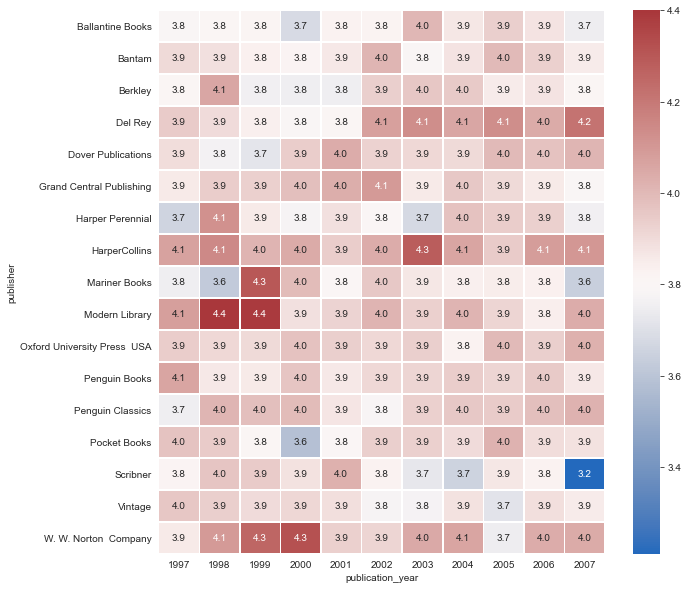

In [193]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(ax = ax, data = df_subset, cmap="vlag", annot=True, linewidths=.5, fmt= '.1f')